### Procesamiento de encuestas
* Versión 2023 

In [1]:
%load_ext autoreload
%autoreload 2

from datetime import datetime
import random
import os as os


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm 

from src.load_data import load_from_folder
from src.survey import remove_basic_columns
from src.survey import rename_columns

In [15]:
# reference = 'Argentina_CABA'
# # date = '2023_05'

# # data_folder = f"/data/{reference}_{date}"
# data_folder = f"/data/{reference}/"

# answers = load_from_folder(f'{data_folder}') 

### Ver porque no funciona la carga de datos TODO
survey = load_from_folder('data/Argentina/')

# survey = pd.read_csv('data/Argentina_CABA/Agentina_CABA_2023_05.csv')


In [18]:
survey.tail()

,ID,Started on,Last updated on,Status,Collector,Language,IP address,Device,{fbclid},"Para empezar, ¿podría indicarnos su edad?",...,¿Usted podría votar a Javier Milei como presidente?,¿Qué opinión tiene de Sergio Massa?,¿Qué opinión tiene de Javier Milei?,¿Qué opinión tiene de Mauricio Macri?,¿Usted votará en las próximas elecciones BALOTAJE de noviembre?,Nombre y Apellido,Numero de Documento,Email,Número de Teléfono,Número de Celular
381,83811572,08/11/2023 5:09:35 pm,10/11/2023 5:34:29 pm,"Started, but not completed yet",Survey Link 1,-,-,Mobile,IwAR1B8qFwpV91S22R-mboc3hTCAfb01lzp_x74heCHoLi...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,83811426,08/11/2023 5:06:09 pm,08/11/2023 5:07:43 pm,"Started, but not completed yet",Survey Link 1,-,-,Mobile,IwAR2yQ224j6vKc1tSYv1F0IZaX1zEzVZMOiqRaj8Il9O7...,30 a 49 años,...,"Sí, lo votaría con seguridad",Muy mala,Regular,Muy buena,Sí,NaN,NaN,NaN,NaN,NaN
383,83811185,08/11/2023 5:00:30 pm,08/11/2023 5:05:42 pm,Completed,Survey Link 1,-,-,Mobile,IwAR1T8g1L9S1WDN8qf183z0jvR34VNc7zdwfuat4uyhcf...,Más de 65 años,...,"Sí, lo votaría con seguridad",Muy mala,Muy buena,Muy buena,Sí,Humberto César Regalado,NaN,NaN,NaN,NaN
384,83810662,08/11/2023 4:47:41 pm,08/11/2023 4:49:55 pm,Completed,Survey Link 1,-,-,Mobile,IwAR134afjQssYC3dAUSDphac6QctdXTTdoKQzAf25BlTY...,30 a 49 años,...,Podría votarlo,No lo conoce,No lo conoce,Regular,Sí,Carolina Alvarenga,NaN,NaN,NaN,NaN
385,83809471,08/11/2023 4:23:10 pm,08/11/2023 4:25:09 pm,"Started, but not completed yet",Survey Link 1,-,-,Mobile,IwAR3ddAFQaXo20DjXetR__hlpAL08e-RLFR4raCIQS_xj...,16 a 29 años,...,Podría votarlo,Muy buena,Mala,Mala,Sí,NaN,NaN,NaN,NaN,NaN


In [19]:
answers = remove_basic_columns(survey)
answers = rename_columns(answers)

In [21]:
answers.head()

,clase,genero,¿Cuál es su máximo nivel de educación?,"En las elecciones GENERALES del 22 de octubre, ¿usted fue a votar?","En las elecciones GENERALES del 22 de octubre, ¿a cuál de los siguientes candidatos a Presidente votó?","Si las elecciones de segunda vuelta a presidente fueran hoy, ¿A cuál de los siguientes candidatos votaría?","En relación a las distintas propuestas políticas, ¿Usted podría votar a un candidato de Unión por la Patria?",¿Usted podría votar a un candidato de La Libertad Avanza?,¿Usted podría votar a Sergio Massa como presidente?,¿Usted podría votar a Javier Milei como presidente?,¿Qué opinión tiene de Sergio Massa?,¿Qué opinión tiene de Javier Milei?,¿Qué opinión tiene de Mauricio Macri?,¿Usted votará en las próximas elecciones BALOTAJE de noviembre?
0,Más de 65 años,Masculino,Secundario completo,"Sí, fue a votar","Patricia Bullrich, de Juntos por el Cambio","Javier Milei, de la Libertad Avanza","No, no lo votaría nunca","Sí, lo votaría con seguridad","No, no lo votaría nunca","Sí, lo votaría con seguridad",Muy mala,Buena,Buena,Sí
1,Más de 65 años,Femenino,Primario incompleto,"Sí, fue a votar","Sergio Massa, de Unión por la Patria","Sergio Massa, de Unión potr la Patria","Sí, lo votaría con seguridad","No, no lo votaría nunca","Sí, lo votaría con seguridad","No, no lo votaría nunca",Buena,Mala,Muy mala,Sí
2,Más de 65 años,Masculino,Secundario completo,"Sí, fue a votar",No sabe,No sabe,Podría votarlo,"No, no lo votaría nunca",Podría votarlo,"No, no lo votaría nunca",Regular,Mala,Muy mala,Sí
3,50 a 64 años,Femenino,Secundario incompleto,"Sí, fue a votar","Sergio Massa, de Unión por la Patria","Sergio Massa, de Unión potr la Patria","Sí, lo votaría con seguridad","No, no lo votaría nunca","Sí, lo votaría con seguridad","No, no lo votaría nunca",Muy buena,Mala,Muy mala,Sí
4,30 a 49 años,Femenino,Terciario/Universitario incompleto,"Sí, fue a votar",Votó en blanco,Votaría en blanco,Podría votarlo,Podría votarlo,No sabe,No sabe,Regular,Regular,Regular,No sabe


In [5]:
answers = answers.drop(columns=['tx_seccion'])


In [22]:
df = answers

nan_count = df.isna().sum() ## or  nan_count = df.isnull().sum()

display(nan_count)

clase                                                                                                            82
genero                                                                                                          123
¿Cuál es su máximo nivel de educación?                                                                          371
En las elecciones GENERALES del 22 de octubre, ¿usted fue a votar?                                              404
En las elecciones GENERALES del 22 de octubre, ¿a cuál de los siguientes candidatos a Presidente votó?          678
Si las elecciones de segunda vuelta a presidente fueran hoy, ¿A cuál de los siguientes candidatos votaría?      390
En relación a las distintas propuestas políticas, ¿Usted podría votar a un candidato de Unión por la Patria?    429
¿Usted podría votar a un candidato de La Libertad Avanza?                                                       473
¿Usted podría votar a Sergio Massa como presidente?                     

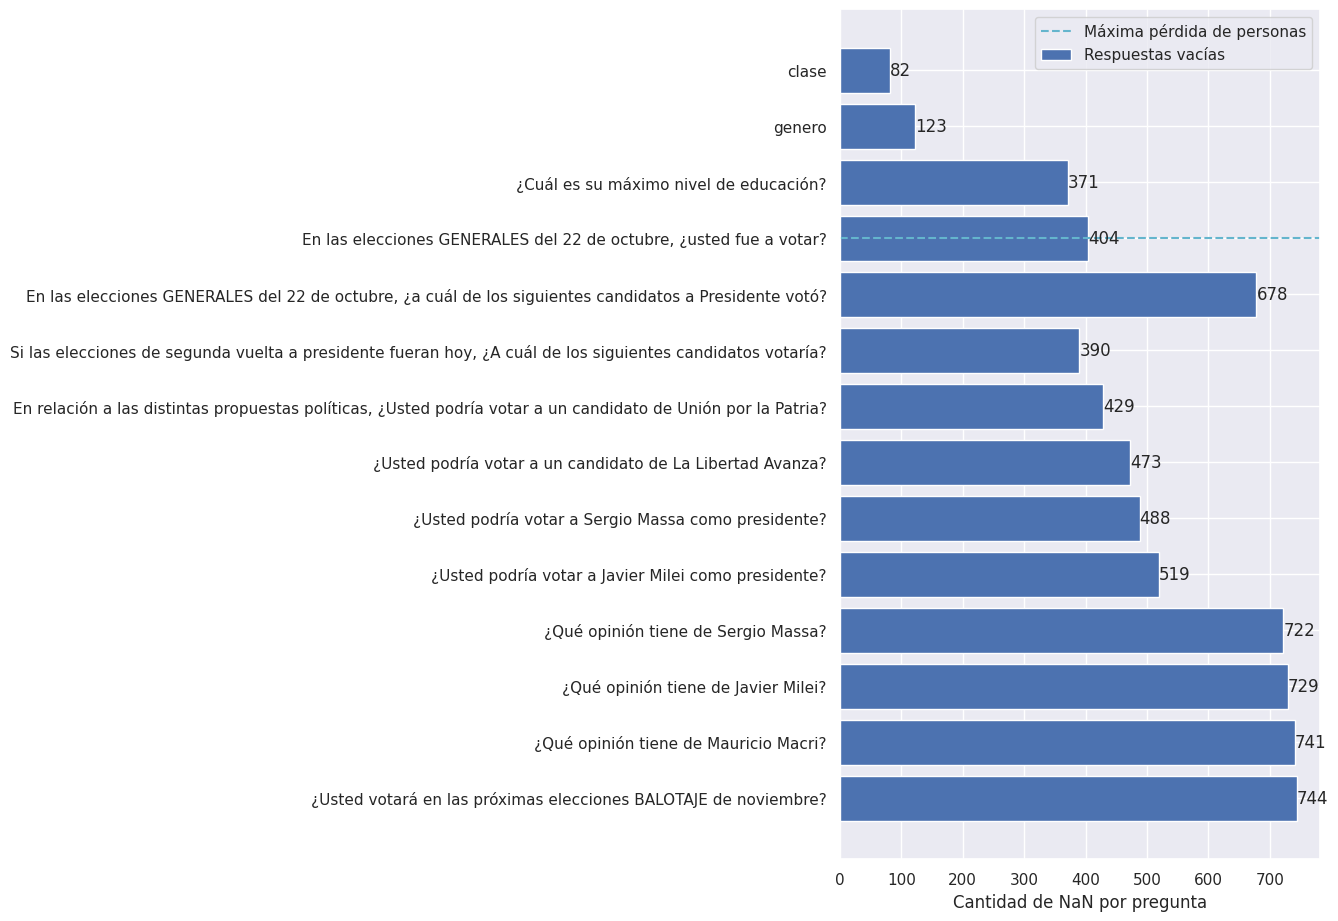

In [24]:
diff_value = [nan_count[i + 1] - nan_count[i] for i in range(len(nan_count) - 1)]
max_diff = diff_value.index(max(diff_value))

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(6, 10))
bars = ax.barh(nan_count.index, nan_count, color='b', label='Respuestas vacías')

ax.axhline(y=max_diff, color='c', linestyle='--', label='Máxima pérdida de personas')
ax.bar_label(bars, labels=None)
ax.invert_yaxis()

plt.subplots_adjust(left=0.3, right=1.1, top=0.95, bottom=0.1)

plt.legend()
# plt.title('')
plt.xlabel('Cantidad de NaN por pregunta')
# plt.ylabel('Pregunta')

plt.show()

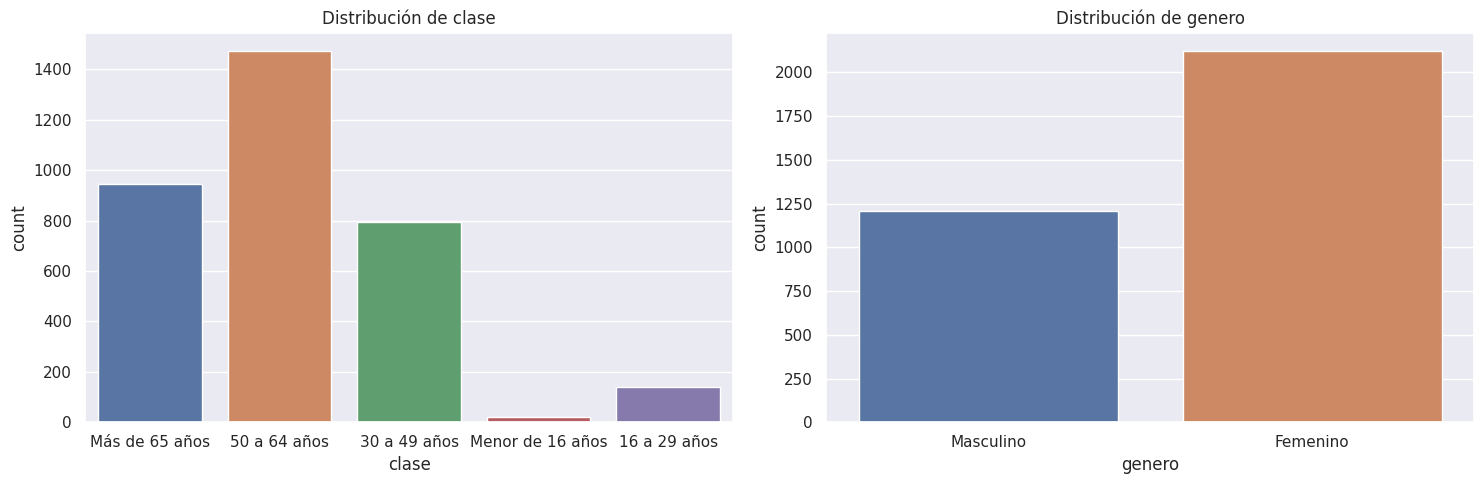

In [27]:
df = answers

df.loc[df.clase == 1.0, 'clase'] = None

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, col in enumerate(['clase', 'genero']):#, 'educacion']):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    

plt.tight_layout()

plt.show()

ValueError: Could not interpret input 'educacion'

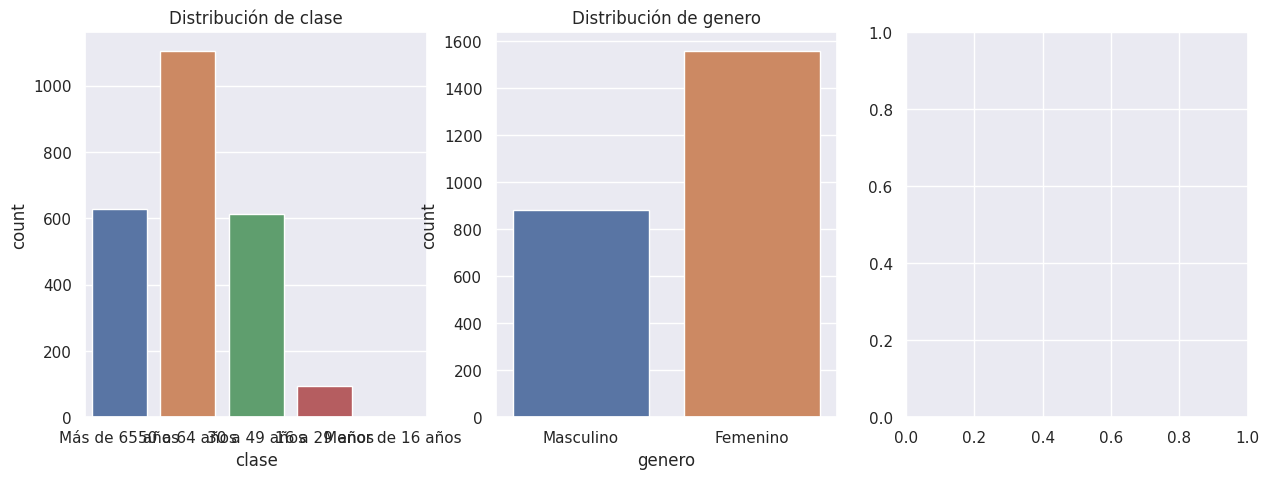

In [28]:
df2 = df 
df2 = df2.dropna()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(['clase', 'genero', 'educacion']):
    sns.countplot(x=col, data=df2, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    
plt.tight_layout()

plt.show()

In [10]:
distribution = pd.read_csv('data/Argentina_CABA/distribucion_CABA.csv')
        

In [11]:
## Los datos son del 2010

distribution['edad'] = distribution['edad']+13  


In [12]:
distribution

distribution.tail(20)

,edad,poblacion,masculino,femenino
81,94,909,303,606
82,95,924,326,598
83,96,807,269,538
84,97,776,258,518
85,98,732,217,515
86,99,642,206,436
87,100,584,166,418
88,101,484,129,355
89,102,369,103,266
90,103,390,96,294


In [13]:
df = df.drop(df.tail(13).index)


,clase,genero,educacion,¿En qué barrio reside actualmente?,¿Cómo evalúa la situación de la Argentina en la actualidad?,¿Cómo evalúa la situación de la Ciudad Autónoma de Buenos Aires en la actualidad?,¿Cómo evalúa la situación de su barrio en la actualidad?,¿Cómo evalúa la gestión del presidente Alberto Fernández?,¿Cómo evalúa la gestión del jefe de gobierno Horacio Rodríguez Larreta?,"Según su opinión, ¿cuál es el principal problema del país?",...,"En relación a las conductas de la gente, siente que:",¿Usted cree que prevalecen en la gente las actitudes individualistas o prevalecen las actitudes solidarias?,¿Cómo siente usted que está actualmente la autoestima de la gente?,"¿Qué opinión tiene sobre el prestigio de las instituciones del gobierno, del poder legislativo y de la justicia?","¿Usted cree que, en general, en el país se vive una situación de justicia o injusticia con los ciudadanos?",¿Usted cree que la gente hoy siente orgullo patriótico por el país?,¿Siente que en el país prevalece la unidad o la división política?,¿Usted cree que en la actualidad hay liderazgos políticos fuertes o liderazgos políticos débiles?,¿Siente que en el país hay instituciones fuertes o instituciones débiles?,"Para finalizar, ¿Cómo se definiría usted políticamente?"
0,3.0,2.0,4.0,6.0,5.0,5.0,3.0,5.0,5.0,5.0,...,2.0,1.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,8.0
1,4.0,2.0,3.0,6.0,2.0,2.0,3.0,3.0,1.0,5.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0
2,2.0,2.0,2.0,1.0,1.0,1.0,2.0,6.0,2.0,0.0,...,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0
3,4.0,1.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.0,2.0,6.0,3.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,5.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6.0
288,4.0,2.0,6.0,6.0,5.0,4.0,4.0,5.0,4.0,7.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6.0
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,3.0,1.0,2.0,6.0,6.0,6.0,4.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
